Stephany Nunez Martinez

# The Project!

In [1]:
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import statsmodels.formula.api as smf
from bioinfokit.analys import stat
from bioinfokit import analys, visuz

In [2]:
surv_con = pd.read_csv('surveyconsumer.csv')
surv_con.head()

,ID,SAMPLE,IDPREV,IDPREV2,AREACD,FIPS,V5,IWMO1,IWDA1,IWYR1,...,V1625,V1626,V1627,V1628,ATTIW,V1632,REFCON,ICS,ICC,ICE
0,1,3,0,0,1,1,99990003,9,29,2021,...,1,2,1,1,1,1,,105.614672,153.377536,74.932367
1,2,3,0,0,1,1,99990035,9,29,2021,...,2,2,1,1,1,1,,135.218864,115.533152,147.864735
2,3,3,0,0,1,1,99990003,9,29,2021,...,1,1,1,1,1,1,,90.812576,77.688768,99.243157
3,4,3,0,0,1,1,99990046,9,29,2021,...,1,2,1,1,1,1,,90.812576,153.377536,50.621578
4,5,3,0,0,1,1,99990010,9,29,2021,...,1,1,1,2,1,1,,76.010480,77.688768,74.932367


In [14]:
surv_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Columns: 247 entries, ID to ICE
dtypes: float64(7), int64(129), object(111)
memory usage: 1.1+ MB


In [11]:
print(surv_con.columns.tolist())

['ID', 'SAMPLE', 'IDPREV', 'IDPREV2', 'AREACD', 'FIPS', 'V5', 'IWMO1', 'IWDA1', 'IWYR1', 'IWMO2', 'IWDA2', 'IWYR2', 'TIMETOT', 'V14', 'V15', 'SAMPID', 'PHCELL', 'PHCLKID', 'PHLINE', 'PHLNKID', 'V21', 'AGE6BKT', 'EDUC', 'SAGE6BKT', 'SPEDUC', 'REGION', 'REGION9', 'YYYYMM', 'YYYYQ', 'YYYY', 'DATEPR', 'WT_AD', 'WT_HH', 'WT', 'RECORD', 'PAGO', 'PAGOR1', 'PAGOR2', 'PAGO5', 'PEXP', 'PEXP5', 'BUS12', 'BAGO', 'NEWS1', 'NEWS2', 'BEXP', 'BUS5', 'GOVT', 'UNEMP', 'RATEX', 'PX1Q1', 'PX1Q2', 'P1FORM', 'PX1', 'PX1QU', 'PX1UR', 'PX5Q1', 'PX5Q2', 'P5FORM', 'PX5', 'PX5QU', 'PX5UR', 'RINC', 'INEXQ1', 'INEXQ2UR', 'INEXQ2', 'INEX', 'HOM', 'HOMRN1', 'HOMRN2', 'SHOM', 'SHOMRN1', 'SHOMRN2', 'DUR', 'DURRN1', 'DURRN2', 'CAR', 'CARRN1', 'CARRN2', 'GASPX1', 'GASPX2', 'GAS5', 'GAS1PX1', 'GAS1PX2', 'GAS1', 'QINCOPEN', 'QINCBKT', 'QINCSUM', 'INCOME', 'INCQFM', 'YTL50', 'YTL3', 'YTL4', 'YTL5', 'YTL10', 'YTL90', 'YTL50X', 'YTL3X', 'YTL4X', 'YTL5X', 'YTL10X', 'YTL90X', 'HOMEOWN', 'HOMEVAL', 'HOMEMKT', 'HOM200K', 'HOM250

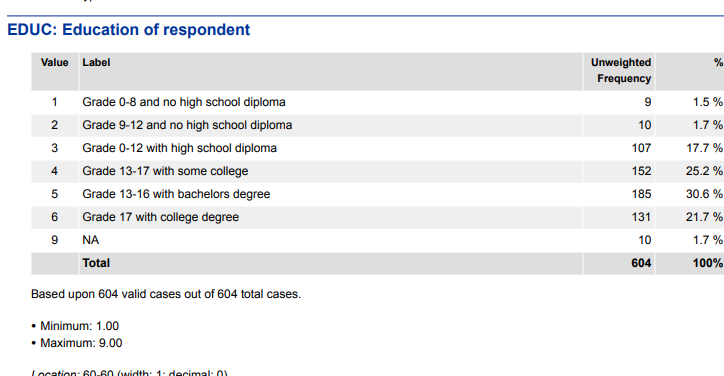


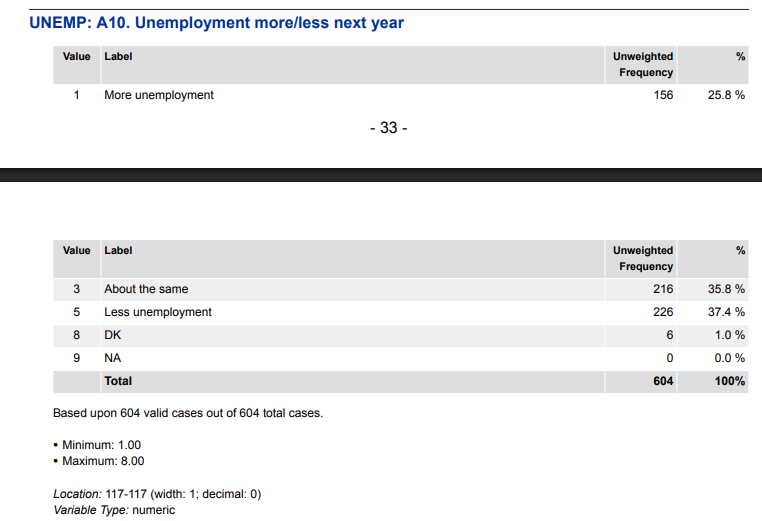

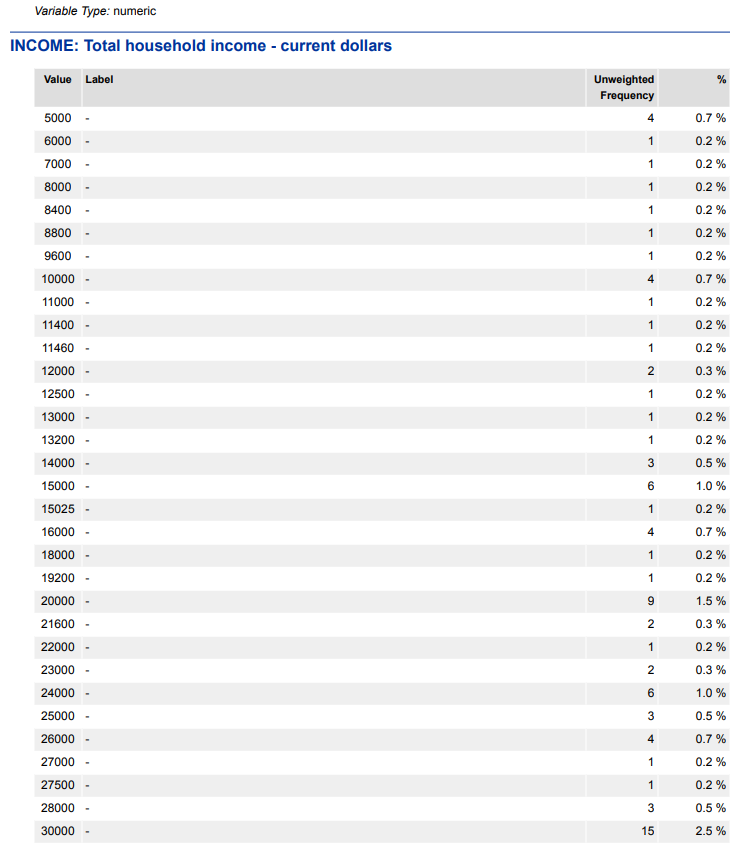

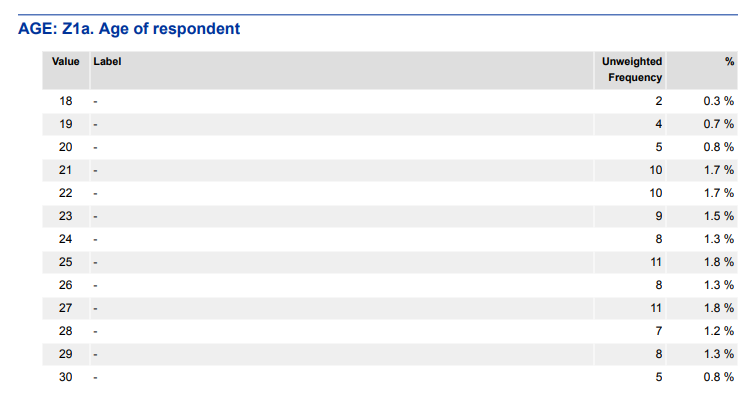

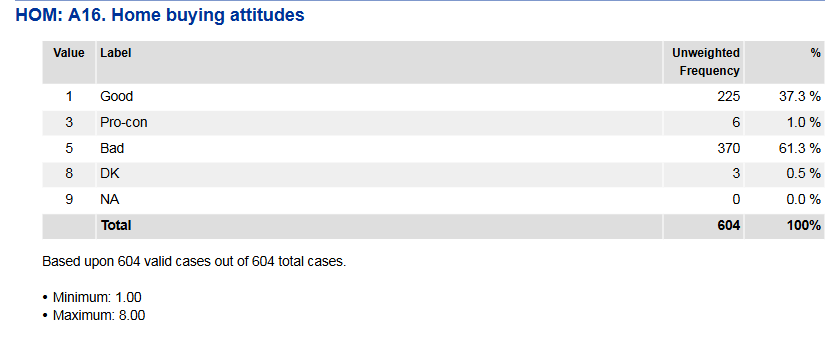

In [70]:
sliced_data = surv_con[['REGION9', 'EDUC', 'WT_AD', 'PAGO', 'UNEMP', 'HOM', 'INCOME', 'HOMEOWN', 'HOMEMKT', 'V650', 'POLAFF', 'V359', 'SEX', 'GOVT','AGE']].copy()

In [71]:
sliced_data

,REGION9,EDUC,WT_AD,PAGO,UNEMP,HOM,INCOME,HOMEOWN,HOMEMKT,V650,POLAFF,V359,SEX,GOVT,AGE
0,9,3,0.50,1,3,5,70000,2,,,3,2,1,5,18
1,1,6,1.50,3,3,5,250000,1,400000,2002,2,2,2,1,45
2,3,3,0.50,5,3,5,37000,2,,,3,3,1,1,25
3,6,4,0.75,1,5,1,150000,1,400000,2013,3,3,1,5,42
4,3,5,0.75,5,5,1,68000,1,400000,2016,3,3,1,5,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,3,1,1.50,5,1,5,5000,2,,,3,4,2,5,72
600,5,2,1.25,5,1,1,37000,2,,,1,1,2,5,56
601,3,5,1.25,1,5,5,25000,1,195000,2014,1,1,1,3,76
602,5,5,0.75,1,5,1,170000,1,350000,1980,1,2,1,5,69


# Statistical Inference

## Linear Regression

### Can personal opinion on unemployment, age, level of education, and home buying attitude predict an individual's income?

In [123]:
# clean data, filled any missing data with value 0 and changed the data type
sliced_data.replace(to_replace = ' ', value = 0) 
sliced_data['INCOME'] = pd.to_numeric(sliced_data['INCOME'], errors='coerce') 
sliced_data['HOMEMKT'] = pd.to_numeric(sliced_data['HOMEMKT'], errors='coerce')

In [124]:
sliced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   REGION9  604 non-null    int64  
 1   EDUC     604 non-null    int64  
 2   WT_AD    604 non-null    float64
 3   PAGO     604 non-null    int64  
 4   UNEMP    604 non-null    int64  
 5   HOM      604 non-null    int64  
 6   INCOME   579 non-null    float64
 7   HOMEOWN  604 non-null    int64  
 8   HOMEMKT  428 non-null    float64
 9   V650     604 non-null    object 
 10  POLAFF   604 non-null    int64  
 11  V359     604 non-null    int64  
 12  SEX      604 non-null    int64  
 13  GOVT     604 non-null    int64  
 14  AGE      604 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 70.9+ KB


<Axes: xlabel='AGE', ylabel='INCOME'>

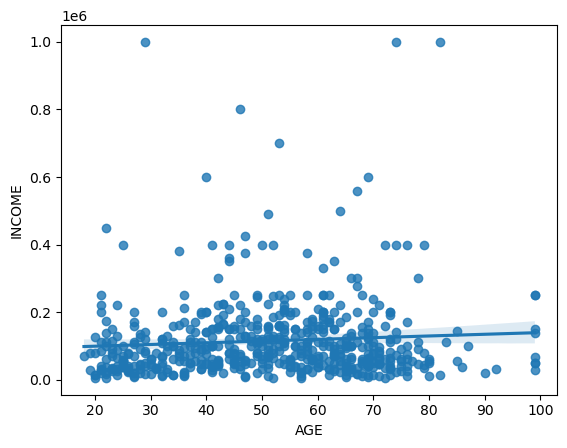

In [138]:
sns.regplot(x='AGE', y='INCOME', data = sliced_data)  # two variables are overlapping each other

In this scatterplot between age and income the values are overlapping eachother. The line seems to be showing very little climb uphill.

In [148]:
# creating frequency table for
educ_unemp = pd.crosstab(sliced_data['EDUC'], sliced_data['HOM'], normalize='index')
educ_unemp

HOM,1,3,5,8
EDUC,,,,
1,0.333333,0.000000,0.666667,0.000000
2,0.700000,0.000000,0.300000,0.000000
3,0.345794,0.018692,0.635514,0.000000
4,0.368421,0.006579,0.625000,0.000000
5,0.351351,0.010811,0.627027,0.010811
6,0.419847,0.007634,0.564885,0.007634
9,0.200000,0.000000,0.800000,0.000000


- About 33.33% of people that completed grade 0-8 and no high school diploma have a good buying home attitude.
- About 66.67% of people that completed grade 0-8 and no high school diploma have a bad buying home attitude.
- About 70.00% of people that completed grade 9-12 and no high school diploma have a good buying home attitude.
- About 30.00% of people that completed grade 9-12 and no high school diploma have a bad buying home attitude.
- About 34.58% of people that completed grade 0-12 with a high school diploma have a good buying attitude.
- About 1.87% of people that completed grade 0-12 with a high school diploma have a pro-con home buying attitude.
- About 63.55% of people that completed grade 0-12 with a high school diploma have a bad home buying attitude.
- About 36.84% of people that completed grade 13-17 with some college have a good buying home attitude.
- About 0.66% of people that completed grade 13-17 with some college have a pro-con buying home attitude.
- About 62.50% of people that completed grade 13-17 with some college have a bad home buying attitude.
- About 35.14% of people that completed grade 13-16 with a bachelors degree have a good home buying attitude.
- About 1.08% of people that have completed grade 13-16 with a bachelors degree have a pro-con home buying attitude.
- About 62.70% of people that have completed grade 13-16 with a bachelors degree have a bad home buying attitude.
- About 1.08% of people that have completed grade 13-16 with a bachelors degree have an unsure home buying attitude.
- About 41.98% of people that have completed grade 17 with a college degree have a good home buying attitude.
- About 0.76% of people that have completed grade 17 with a college degree have a pro-con home buying attitude.
- About 56.49% of people that have completed grade 17 with a college degree have a bad home buying attitude.
- About 0.76% of people that have completed grade 17 with a college degree have an unsure home buying attitude.


In [144]:
# liner regression model --> predicting income 
multi_lin = smf.ols('INCOME ~ AGE + C(HOM) + C(EDUC)+ C(UNEMP)', data=sliced_data).fit()
multi_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 INCOME   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     7.230
Date:                Sun, 14 Dec 2025   Prob (F-statistic):           3.71e-13
Time:                        21:55:39   Log-Likelihood:                -7536.4
No. Observations:                 579   AIC:                         1.510e+04
Df Residuals:                     565   BIC:                         1.516e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.466e+04   4.59e+04      0.319      0.750   -7.56e+04    1.05e+05
C(HOM)[T.3]   -3.456e+04   4.57e+04     -0.757      0.450   -1.24e+05    5.52e+04
C(HOM)[T.5]   -1.164e+04   9664.897     -1.205      0.229   -3.06e+04    7339.460
C(HOM)[T.8]   -1.373e+05   6.61e+04     -2.076      0.038   -2.67e+05   -7418.259
C(EDUC)[T.2]   3.617e+04   5.73e+04      0.631      0.528   -7.64e+04    1.49e+05
C(EDUC)[T.3]   3.337e+04   4.31e+04      0.774      0.439   -5.13e+04    1.18e+05
C(EDUC)[T.4]   7.064e+04   4.28e+04      1.652      0.099   -1.34e+04    1.55e+05
C(EDUC)[T.5]   1.017e+05   4.26e+04      2.389      0.017    1.81e+04    1.85e+05
C(EDUC)[T.6]   1.473e+05   4.29e+04      3.430      0.001    6.29e+04    2.32e+05
C(EDUC)[T.9]    3.82e+04   5.57e+04      0.686      0.493   -7.11e+04    1.48e+05
C(UNEMP)[T.3] -2349.3421    1.2e+04     -0.196      0.844   -2.59e+04    2.12e+04
C(UNEMP)[T.5]  1.284e+04    1.2e+04      1.068      0.286   -1.08e+04    3.65e+04
C(UNEMP)[T.8]  9.215e+04   4.73e+04      1.949      0.052    -717.988    1.85e+05
AGE             290.8290    265.294      1.096      0.273    -230.254     811.912
==============================================================================
Omnibus:                      475.308   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10925.100
Skew:                           3.518   Prob(JB):                         0.00
Kurtosis:                      23.083   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Statistical Significance:
- Since p-value is greater than 0.05, having a Pro-con home-buying attitude vs a good one CANNOT significantly predict an individual's income.
- Since p-value is greater than 0.05, having a Bad home-buying attitude vs a good one CANNOT significantly predict an individual's income.
- Since p-value is less than 0.05, having an unsure attitude vs a good one CAN significantly predict an individual's income.
- Since p-value is more than 0.05, completing grade 9-12 with no high school diploma vs grade 0-8 and no hs diploma CANNOT significantly predict an individual's income.
- Since p-value is more than 0.05, completing grade 0-12 with high school diploma vs grade 0-8 and no hs diploma CANNOT significantly predict an individual's income.
- Since p-value is more than 0.05, completing grade 13-17 with some college vs grade 0-8 and no hs diploma CANNOT significantly predict an individual's income.
- Since p-value is less than 0.05, completing grade 13-16 with bachelors degree vs grade 0-8 and no hs diploma CAN significantly predict an individual's income.
- Since p-value is less than 0.05, completing grade 17 with college degree vs grade 0-8 and no hs diploma CAN significantly predict an individual's income.
- Since p-value is more than 0.05, feeling that unemployment will remain the same vs feeling more unemployment next year CANNOT predict an individual's income.
- Since p-value is more than 0.05, feeling that there will be less unemployment vs feeling more unemployment next year CANNOT predict an individual's income.
- Since p-value is more than 0.05, not knowing if unemployment will change or remain vs feeling more unemployment next year CANNOT predict an individual's income.
- Since p-value is more than 0.05, age CANNOT predict an individual's income.

### Practical Significance
- r^2 is 0.123. Age, home buying attitude, level of education, and prediction of unemployment togther predict 12.3% of amount of income.
- People who have a pro-con home-buying attitude had 3.456e+04 less income compared to those who had a good attitude, on average.
- People who have a bad home-buying attitude had 1.164e+04 less income compared to those who had a good attitude on average.
- People who have an unsure attitude had 1.373e+05 less income compared to those who had a good attitude on average.
- People who have grade 9-12 with no high school diploma had 3.617e+04 more income compared to people with 0-8 and no highshcool diploma, on average.
- People who have complete 0-12 with a high school diploma had 3.337e+04 more income compared to people with 0-8 and no high school diploma, on average.
- People who completed 13-17 with some college had 7.064e+04 more income compared to people grade 0-8 with no high school diploma, on average.
- People with grade 13-16 with a bachelors degree had 1.017e+05 more income compared to people grade 0-8 with no high school diploma, on average.
- People completing grade 17 with a college degree had 1.473e+05 more income compared to people grade 0-8 with no high school diploma, on average.
- People that believed unemployment would remain the same had 2349.3421 less income compared to people compared to those who believed in more unemployment, on average.
- People that believed less unemployment had 1.284e+04 more income compared to those who believed in more unemployment, on average.
- People that were unsure had 9.215e+04 more income compared to those who believed in more unemployment, on average.
- People's age had 290.8290 more income. 

<Axes: xlabel='HOM', ylabel='INCOME'>

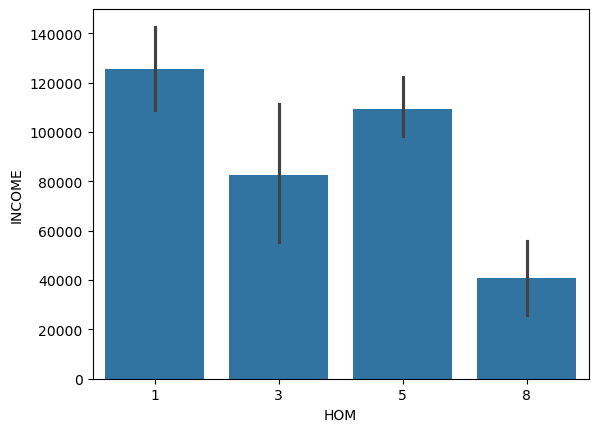

In [153]:
sns.barplot(x='HOM', y='INCOME', data=sliced_data) # homebuying attitude and income

- People with a good buying home attitude has the highest income group sitting above 120,000.
- People with a bad buying home attitude have the second highest income group sitting below 120,000.

<Axes: xlabel='EDUC', ylabel='INCOME'>

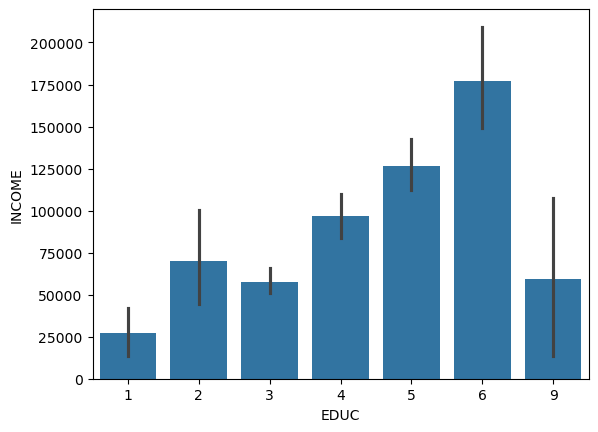

In [154]:
sns.barplot(x='EDUC', y='INCOME', data=sliced_data)

- People completing grade 17 and with a college degree are the highest income holders.

C:\Users\steph\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


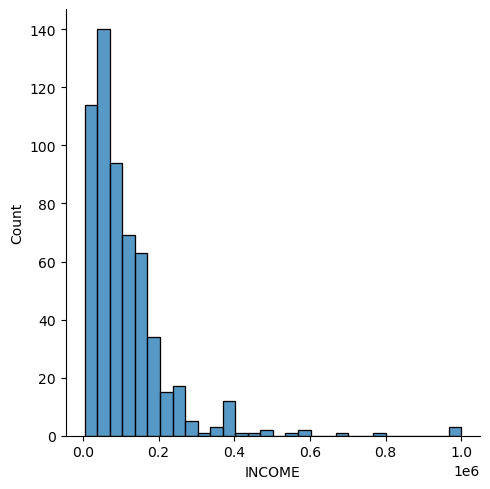

In [156]:
sns.displot(x='INCOME', data= sliced_data, bins=30)

The INCOME value has a right skew and many outliers that can affect the mean in the data. It can also be the values I had to fill due to missing data.

In [157]:
sliced_data['INCOME'].describe()

count       579.000000
mean     114728.583765
std      117603.500360
min        5000.000000
25%       45000.000000
50%       85000.000000
75%      150000.000000
max      999995.000000
Name: INCOME, dtype: float64

While the data is skewed, it has a mean that is 114,728. It is better to use the median.

In [159]:
sliced_data['INCOME'].median()

85000.0

The INCOME median is 85,000.

In [158]:
sliced_data['AGE'].describe()

count    604.000000
mean      51.437086
std       18.003805
min       18.000000
25%       38.000000
50%       52.000000
75%       65.000000
max       99.000000
Name: AGE, dtype: float64

In the dataset, the mean age is 51.